In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [30]:
import time
from datetime import datetime

In [31]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# random latitude and longitude

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs) # The zip object packs each pair of lats and lngs into a tuple.

lat_lngs

In [5]:
# unpack our lat_lngs zip object into a list # Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [6]:
cities = []

# nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

627

In [7]:
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") # This will find the corresponding weather data

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    

    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | iquique
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | maldonado
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | grand gaube
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | cedar city
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | baruun-urt
Processing Record 18 of Set 1 | bhavani
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | gold coast
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | tiarei
Proc

Processing Record 35 of Set 4 | ayan
Processing Record 36 of Set 4 | hay river
Processing Record 37 of Set 4 | camacha
Processing Record 38 of Set 4 | zuenoula
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | omagh
Processing Record 42 of Set 4 | khandbari
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | smolenka
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | kibaya
Processing Record 47 of Set 4 | ormond beach
Processing Record 48 of Set 4 | bodden town
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | sinnamary
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | impfondo
Processing Record 3 of Set 5 | beringovskiy
Processing Record 4 of Set 5 | mae sot
Processing Record 5 of Set 5 | nikolskoye
Processing Record 6 of Set 5 | satipo
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5

Processing Record 23 of Set 8 | acapulco
Processing Record 24 of Set 8 | mirnyy
Processing Record 25 of Set 8 | marrakesh
Processing Record 26 of Set 8 | safford
Processing Record 27 of Set 8 | greymouth
Processing Record 28 of Set 8 | krasnystaw
Processing Record 29 of Set 8 | samdrup jongkhar
Processing Record 30 of Set 8 | vila franca do campo
Processing Record 31 of Set 8 | taoudenni
Processing Record 32 of Set 8 | utashinai
Processing Record 33 of Set 8 | fagersta
Processing Record 34 of Set 8 | norman wells
Processing Record 35 of Set 8 | chiochis
Processing Record 36 of Set 8 | haverhill
Processing Record 37 of Set 8 | minamata
Processing Record 38 of Set 8 | hvammstangi
City not found. Skipping...
Processing Record 39 of Set 8 | iberia
Processing Record 40 of Set 8 | banchory
Processing Record 41 of Set 8 | lydenburg
Processing Record 42 of Set 8 | kedougou
Processing Record 43 of Set 8 | chibombo
Processing Record 44 of Set 8 | jutai
Processing Record 45 of Set 8 | trincomalee

Processing Record 14 of Set 12 | vernon
Processing Record 15 of Set 12 | sabang
Processing Record 16 of Set 12 | kerman
Processing Record 17 of Set 12 | cessnock
Processing Record 18 of Set 12 | kulachi
Processing Record 19 of Set 12 | chernyakhovsk
Processing Record 20 of Set 12 | aginskoye
Processing Record 21 of Set 12 | madang
Processing Record 22 of Set 12 | pacific grove
Processing Record 23 of Set 12 | sal rei
Processing Record 24 of Set 12 | ustupo
Processing Record 25 of Set 12 | kununurra
Processing Record 26 of Set 12 | boguchar
Processing Record 27 of Set 12 | tanout
Processing Record 28 of Set 12 | dakar
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | montrose
Processing Record 31 of Set 12 | yenagoa
Processing Record 32 of Set 12 | honiara
Processing Record 33 of Set 12 | laje
Processing Record 34 of Set 12 | fare
Processing Record 35 of Set 12 | oksfjord
Processing Record 36 of Set 12 | owando
Processing Record 37 of Set 12 | mongo
Processing 

In [9]:
# convert a list of dictionaries to a Pandas DataFrame 

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.13,75,93,11.48,KI,2021-12-04 00:41:55
1,Cape Town,-33.9258,18.4232,64.11,67,0,4.00,ZA,2021-12-04 00:36:59
2,Iquique,-20.2208,-70.1431,66.24,73,7,1.86,CL,2021-12-04 00:41:56
3,Esperance,-33.8667,121.9000,64.24,52,0,12.01,AU,2021-12-04 00:41:56
4,Punta Arenas,-53.1500,-70.9167,53.71,54,75,19.57,CL,2021-12-04 00:37:03
5,Maldonado,-34.6667,-54.9167,66.22,91,55,7.31,UY,2021-12-04 00:37:26
6,Longyearbyen,78.2186,15.6401,35.44,60,40,18.41,SJ,2021-12-04 00:41:22
7,Avarua,-21.2078,-159.7750,73.45,94,75,14.97,CK,2021-12-04 00:41:57
8,Rikitea,-23.1203,-134.9692,76.93,72,7,14.85,PF,2021-12-04 00:41:57
9,Grand Gaube,-20.0064,57.6608,77.38,76,23,3.00,MU,2021-12-04 00:41:58


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-12-04 00:41:55,3.0707,172.7902,82.13,75,93,11.48
1,Cape Town,ZA,2021-12-04 00:36:59,-33.9258,18.4232,64.11,67,0,4.00
2,Iquique,CL,2021-12-04 00:41:56,-20.2208,-70.1431,66.24,73,7,1.86
3,Esperance,AU,2021-12-04 00:41:56,-33.8667,121.9000,64.24,52,0,12.01
4,Punta Arenas,CL,2021-12-04 00:37:03,-53.1500,-70.9167,53.71,54,75,19.57
...,...,...,...,...,...,...,...,...,...
569,Svetlogorsk,BY,2021-12-04 00:57:20,52.6333,29.7333,30.96,86,98,11.25
570,Rundu,NA,2021-12-04 00:57:20,-17.9333,19.7667,72.73,56,43,6.20
571,Pucallpa,PE,2021-12-04 00:57:20,-8.3791,-74.5539,82.44,83,40,4.61
572,Portobelo,PA,2021-12-04 00:57:21,9.5500,-79.6500,80.04,89,69,14.61


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

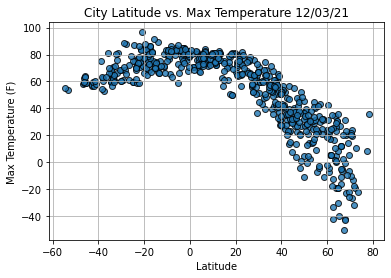

In [15]:
import time

# scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

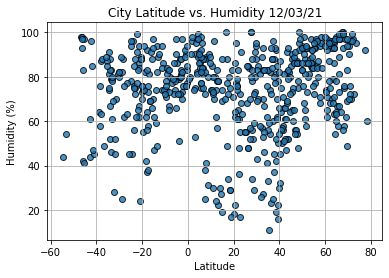

In [16]:
# latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

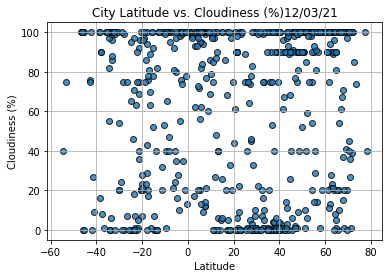

In [18]:
# latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

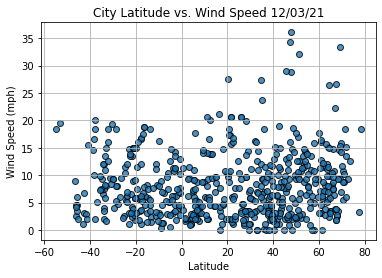

In [19]:
# latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [20]:
# Linear Regression:

# linregress(independent_var,dependet_var)

# save output as a tuple, same size as lineregress output
# (slope, incertept, rval, pval, stderr) = linregress(independent_var,dependet_var)
# independent variable = latitude (x-axis)

In [23]:
# Import linear regression from the SciPy stats module.

from scipy.stats import linregress

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City               Saint-Philippe
Country                        RE
Date          2021-12-04 00:41:59
Lat                      -21.3585
Lng                       55.7679
Max Temp                    74.75
Humidity                       86
Cloudiness                     36
Wind Speed                   8.95
Name: 13, dtype: object

In [37]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
569     True
570    False
571    False
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-12-04 00:41:55,3.0707,172.7902,82.13,75,93,11.48
6,Longyearbyen,SJ,2021-12-04 00:41:22,78.2186,15.6401,35.44,60,40,18.41
11,Albany,US,2021-12-04 00:38:14,42.6001,-73.9662,31.62,61,1,1.01
12,Cedar City,US,2021-12-04 00:41:58,37.6775,-113.0619,50.97,37,1,3.44
14,Cayenne,GF,2021-12-04 00:41:59,4.9333,-52.3333,76.08,91,72,7.00


In [40]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [41]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

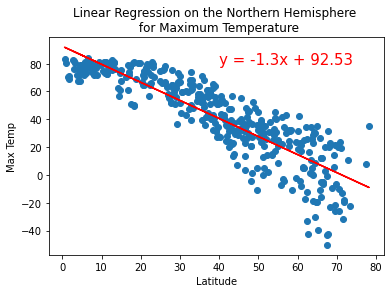

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(40,80))

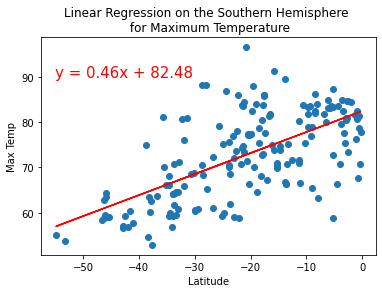

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-55,90))


In [56]:
# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

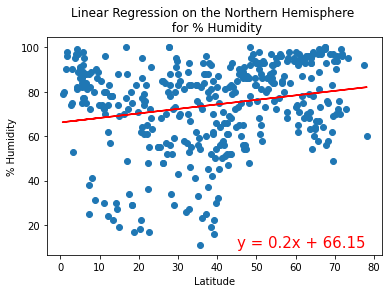

In [60]:
# Linear regression on the Northern Hemisphere (latitude and percent humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(45,10))

In [61]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

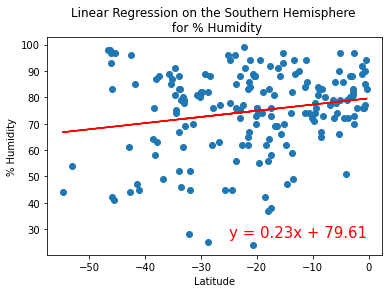

In [68]:
# Linear regression on the Southern Hemisphere (latitude and percent humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-25,27))

In [69]:
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

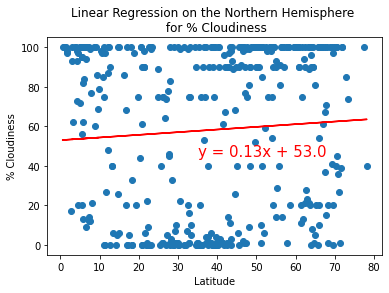

In [76]:
# Linear regression on the Northern Hemisphere (Latitude and Cloudiness)
x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(35,45))

In [78]:
# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

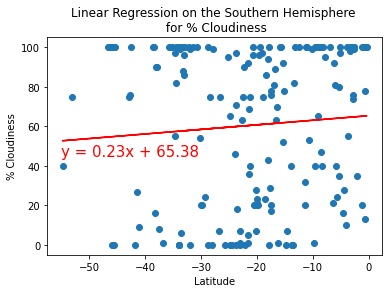

In [81]:
# Linear regression on the Southern Hemisphere (Latitude and Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-55,45))

In [82]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

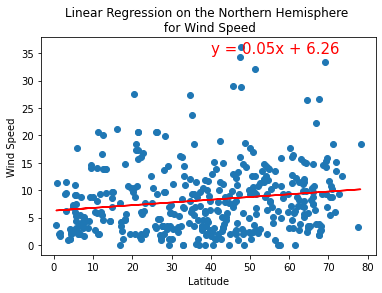

In [83]:
# Linear regression on the Northern Hemisphere (Latitude and Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))


In [84]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

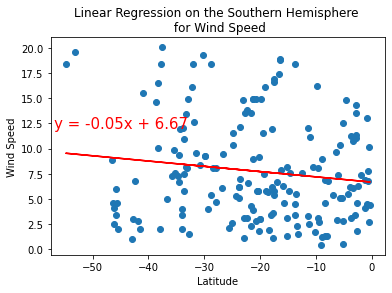

In [90]:
# Linear regression on the Southern Hemisphere (Latitude and Wind Speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-57,12))